## PROBLEM:

For the socio-economic, physiological, and environmental factors in various countries, which ones influence rates for mental illness?

### Authors:
Key Xu, Shalini Patel, Sejal Gupta, Siddarth Ravikanti, and Zaineb Qadri

## Data used throughout the notebook:

#### Mental Health Data: https://www.kaggle.com/datasets/programmerrdai/mental-health-dataset <br>
This source includes multiple mental health illnesses over the course of 1990-2017, for various countries in the world.

#### GDP Data: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD<br>

This source includes global countries' GDP across 1960-2021.

#### Countries Data: https://www.kaggle.com/datasets/fernandol/countries-of-the-world<br>

This source includes global countries and their corresponding regions/subregions
#### Change in GDP Data: https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG<br>

This source includes global countries' percentage change in GDP across 1961-2021.

#### EPI Data: https://epi.yale.edu/epi-downloads 
This source includes the EPI index across the year 2017.

#### Export Data: https://data.worldbank.org/indicator/NE.EXP.GNFS.ZS
This source includes exports of goods and services in countries over 1960-2021.

#### Employment rate Data: https://data.worldbank.org/indicator/SL.EMP.TOTL.SP.ZS
This source includes the employment rates in countries over 190-2021

#### healthy life expectancy- https://apps.who.int/gho/data/node.main.688

This source includes the employment rate in countries. 

#### school enrollment- https://data.worldbank.org/indicator/SE.PRM.NENR

This source includes the school enrollment count in countries over 1960-2021

#### happiness- https://www.kaggle.com/datasets/unsdsn/world-happiness

This source includes the happiness index in countries over 190-2021

## Question 1
Do socioeconomic factors for a country have significant influence on the rate of mental health disorders in that country?

#### Motivation:

The economic success of a country can be partially determined by a multitude of factors. We have chosen it's growth in GDP, Export of goods and services, and employment rates as best indicators of a country's socio economic status. Understanding a potential relationship between mental health illness rates and these factors can inform public health policies and directives to improve the mental health outcomes of the citizens.

#### Methods:

Our approach to analyzing these factors and the multiple mental health disorder variables is to perform a mutlivariate correlation analysis. We included change in GDP data from over a decade from countries globally for more accurate data. We expect a relationship to be high within more financially motivated external factors such as drug abuse and alcohol use, and overall a reasonable relationship between the variables can be visualized with an interactive scatterplot. We also analyzed export of goods and services data by using correlation as well to view visual relationships and proceed to conduct further analysis. We repeated the same methods for employment data per country. We expect that these factors will have some correlation. 

In [1]:
import warnings #Prevents annoying warnings from displaying

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import sklearn.cluster

### Data Cleaning and Processing

We must clean the datasets in order to create an accurate scatter plot matrix and have the data in the correct formatting for further analysis.
    
#### Mental Health Data:
Rename the columns to have more straightforward labels, convert the data values for percentages from string to numeric, and impute the NaN percentage values with the mean percentage rate of each mental health disorder. Some of the data was incorrect initially, with percentages over 1, so we filtered the dataset to only feature the correct values.<br>

##### Rationale for imputing on mean:
The rate of mental health disorders do not have significant variance for individual 
countries, and the quantity of our data points is approximately normalized, 

#### GDP Data:
Since the years in GDP data were listed in columns, we melted the data in order to eventually merge this dataset with the mental illness dataset, while retaining the various datapoints across different years. We filtered the data to be from the same range as the mental health dataset, 1990 - 2017, then sorted it by Country in alphabetical order. We imputed the missing GDP values with the median GDP of each country.

##### Rationale for imputing on median:
The GDP values have higher spread, and median performs better with datasets of higher variance, while not impacting  the center too much.

#### Countries Data:
We included this dataset to group countries by continent (region), so we removed columns didn't necessarily need, then merged it with our main combined dataset. We included other columns from the dataset in our merge for future reference.

#### Change in GDP Data:
Since the percent change in GDP data were listed in columns, we melted the data in order to eventually merge this dataset with main dataset, while retaining the various datapoints across different years. We only kept the relevant columns and merged this with the main dataset.

#### Employment Data:
We had a similar problem with this data set as the previous ones where the Employment rates were listed in columns and the years in our other data set were listed in columns as well. We proceeded to melt the daa and merge with our main data set for the mental illness rates. We removed columns that were not needed as well.

#### Export Data:
The structure of this data is similar to Employment Data and GDP data. We had a similar problem with this data set as the previous ones where the Export rates were listed in columns and the years in our other data set were listed in columns as well. We proceeded to melt the daa and merge with our main data set for the mental illness rates.

In [3]:
# mental_health_data = mental health data
# mental_health_data cleaning
mental_health_data = pd.read_csv('Mental_Global.csv', on_bad_lines='skip')

mental_health_data = mental_health_data.rename(columns={
    'Entity': 'Country',
    'Code': 'Country Code',
    'Year': 'Year',
    'Schizophrenia (%)': 'Schizophrenia',
    'Bipolar disorder (%)': 'Bipolar Disorder',
    'Eating disorders (%)': 'Eating Disorders',
    'Anxiety disorders (%)': 'Anxiety Disorders',
    'Drug use disorders (%)': 'Drug Use Disorders',
    'Depression (%)': 'Depression',
    'Alcohol use disorders (%)': 'Alcohol Use Disorders'
})
mental_health_data.iloc[:, 4:] = mental_health_data.iloc[:, 4:].apply(pd.to_numeric, errors='coerce')
mental_health_data = mental_health_data.fillna(mental_health_data.mean())
mental_health_data = mental_health_data.loc[(mental_health_data.iloc[:, 4:] <= 100).all(axis=1)]

In [4]:
# emp_rate_data = employment rate data
# employment rate data cleaning
emp_rate_data = pd.read_csv('employ.csv', on_bad_lines='skip')
emp_rate_data = pd.melt(emp_rate_data, id_vars = emp_rate_data.columns[:4], value_vars = emp_rate_data.columns[4:], var_name='Year', value_name='Employment-Rate')
emp_rate_data = emp_rate_data.rename(columns = {
    'Country Name': 'Country',
})

emp_rate_data = emp_rate_data.sort_values(by='Country')
emp_rate_data = emp_rate_data[emp_rate_data['Year'].astype(float) >= 1990]
emp_rate_data = emp_rate_data[emp_rate_data['Year'].astype(float) <= 2017]

emp_rate_data = emp_rate_data.fillna(emp_rate_data.median()) 

In [5]:
# Merged employment rate data && mental health data: merge_e(employment rate)m(mental health)_data
merge_em_data = pd.merge(emp_rate_data, mental_health_data, on=["Country", "Year"])
print("Unique Country values:", len(set(merge_em_data['Country'])))
print("Unique Year values:", (sorted(list(set(merge_em_data['Year'])))))
merge_em_data = merge_em_data.drop(['Indicator Code', 'index'], axis = 1)
merge_em_data = merge_em_data.rename(columns = {
    'Country Code_x':'Country Code',
    'Drug Use Disorders':'Drug Disorders',
    'Alcohol Use Disorders':'Alcohol Disorders'

})

Unique Country values: 171
Unique Year values: ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


In [6]:
# gdp_data = GDP data
# gdp_data cleaning

gdp_data = pd.read_csv("GDP_Countries.csv") 
gdp_data = pd.melt(gdp_data, id_vars = gdp_data.columns[:4], value_vars = gdp_data.columns[4:], var_name='Year', value_name='GDP')
gdp_data = gdp_data.rename(columns = {
    'Country Name': 'Country',
    'Indicator Name': 'Indicator'
})
gdp_data = gdp_data[gdp_data['Year'].astype(float) >= 1990]
gdp_data = gdp_data[gdp_data['Year'].astype(float) <= 2017]
gdp_data = gdp_data.sort_values(by='Country')
gdp_data = gdp_data.fillna(gdp_data.median()) 

In [7]:
# Dgdp_data = gdp per capita change over the years
# Dgdp_data cleaning
Dgdp_data = pd.read_csv('GDP_percap_deriv.csv')
Dgdp_data = pd.melt(Dgdp_data, id_vars = Dgdp_data.columns[:4], value_vars = Dgdp_data.columns[4:], var_name='Year', value_name='dGDP per Cap')
filterCols = ['Country Name', 'Year', 'dGDP per Cap']
Dgdp_data = Dgdp_data[filterCols]
Dgdp_data = Dgdp_data.rename(columns = {
    'Country Name': 'Country'
})

In [8]:
# country_data = country data
# country_data cleaning
country_data = pd.read_csv('countries.csv')
filterCols = ['country', 'region', 'subregion', 'pop2023', 'density']
country_data = country_data[filterCols]
country_data = country_data.rename(columns = {
    'country':'Country',
    'region':'Region',
    'pop2023':'Population 2023',
    'subregion':'Subregion',
    'density':'Density'
})

In [9]:
# Merged GDP data && employement rate data && mental health data: merge_e(employment rate)m(mental health)g(GDP)_data
merge_emg_data = pd.merge(gdp_data, mental_health_data, on=["Country", "Year"])
merge_emg_data = pd.merge(merge_emg_data, Dgdp_data, on=["Country", "Year"])
print("Unique Country values:", len(set(merge_emg_data['Country'])))
print("Unique Year values:", (sorted(list(set(merge_emg_data['Year'])))))
merge_emg_data = pd.merge(merge_emg_data, country_data, on=["Country"])
merge_emg_data = merge_emg_data.drop(['Indicator', 'index', 'Country Code_y', 'Population 2023'], axis = 1)
merge_emg_data = merge_emg_data.rename(columns = {
    'Country Code_x':'Country Code',
    'Drug Use Disorders':'Drug Disorders',
    'Alcohol Use Disorders':'Alcohol Disorders'

})
merge_emg_data = merge_emg_data.sort_values(by='Year')
merge_emg_data_merge = merge_emg_data[merge_emg_data['Year'] == '2017']

Unique Country values: 171
Unique Year values: ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


In [10]:
# export_data cleaning
export_data = pd.read_csv("export.csv")
export_data = pd.melt(export_data, id_vars = export_data.columns[:4], value_vars = export_data.columns[4:], var_name = 'Year', value_name = 'Exports')

export_data = export_data.fillna(export_data.median()) 

export_data = export_data.rename(columns = {
    'Country Name': 'Country',
    'Indicator Name': 'Indicator'
})
export_data = export_data[export_data['Year']== '2017']

In [11]:
# Merged export data && mental health data: merge_xm_data
merge_xm_data = pd.merge(export_data, mental_health_data, on=["Country", "Year"])

merge_xm_data = merge_xm_data[merge_xm_data['Year'] == '2017']

## Analysis Process:

#### We are choosing the various societal factors of a country as the testing points because we infer that the success of a country correlates to the mental health of its citizens.

#### Testing the percent change in GDP per capital across 1990 - 2017, all countries, for correlation with the mental health disorder rate

In [12]:
columns_of_interest = ['Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Disorders', 'Depression', 'Alcohol Disorders']
selected_columns = merge_em_data[columns_of_interest]

row_means = selected_columns.mean(axis=1)
merge_em_data['Mental Health Mean'] = row_means

merge_em_data = merge_em_data.sort_values(by='Year')
data_2017 = merge_em_data[merge_em_data['Year'] == '2017']



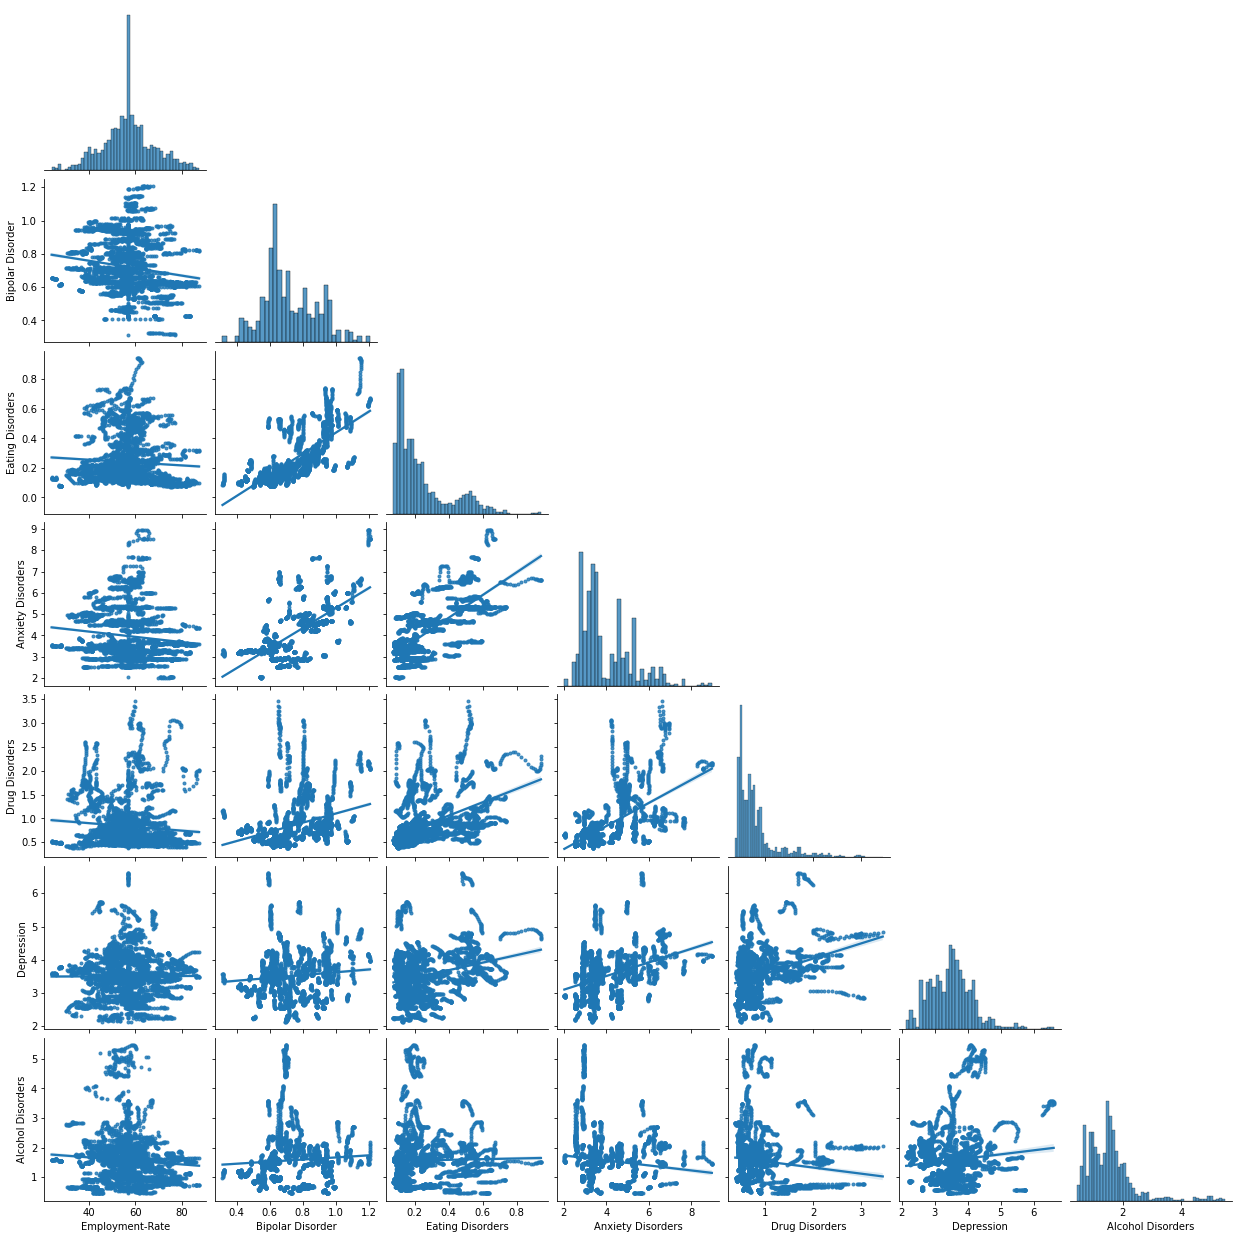

In [13]:
variables = ['Employment-Rate', 'Year', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Disorders', 'Depression', 'Alcohol Disorders']
sns.pairplot(merge_em_data[variables], markers = '.', kind='reg', diag_kind='hist', corner=True)
plt.show()

- Running scatterplot matrix to see if there is visual correlation between change in Environmental and the various mental health disorder rates

In [14]:

variables = ['Employment-Rate', 'Year', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Disorders', 'Depression', 'Alcohol Disorders']
subset = merge_em_data[variables]
#this is calculating Pearson correlation coefficients
corr_matrix = subset.corr()
print(corr_matrix)

                   Employment-Rate  Bipolar Disorder  Eating Disorders  \
Employment-Rate           1.000000         -0.151475         -0.066684   
Bipolar Disorder         -0.151475          1.000000          0.731863   
Eating Disorders         -0.066684          0.731863          1.000000   
Anxiety Disorders        -0.116642          0.657387          0.726248   
Drug Disorders           -0.091472          0.331377          0.469217   
Depression                0.004668          0.104134          0.270877   
Alcohol Disorders        -0.078821          0.069439          0.021717   

                   Anxiety Disorders  Drug Disorders  Depression  \
Employment-Rate            -0.116642       -0.091472    0.004668   
Bipolar Disorder            0.657387        0.331377    0.104134   
Eating Disorders            0.726248        0.469217    0.270877   
Anxiety Disorders           1.000000        0.596688    0.359932   
Drug Disorders              0.596688        1.000000    0.324381   

Since there were no visual correlations seen in the scatter plot matrix. We decided to run pearsons correlation to see whether there was any numerical correlation between the employment rates and the mental illness disorders. Based on the coefficients it seems that there is correlation between employment rates and depression. The other mental disorders seem to have negative correlation with the employment rates. 


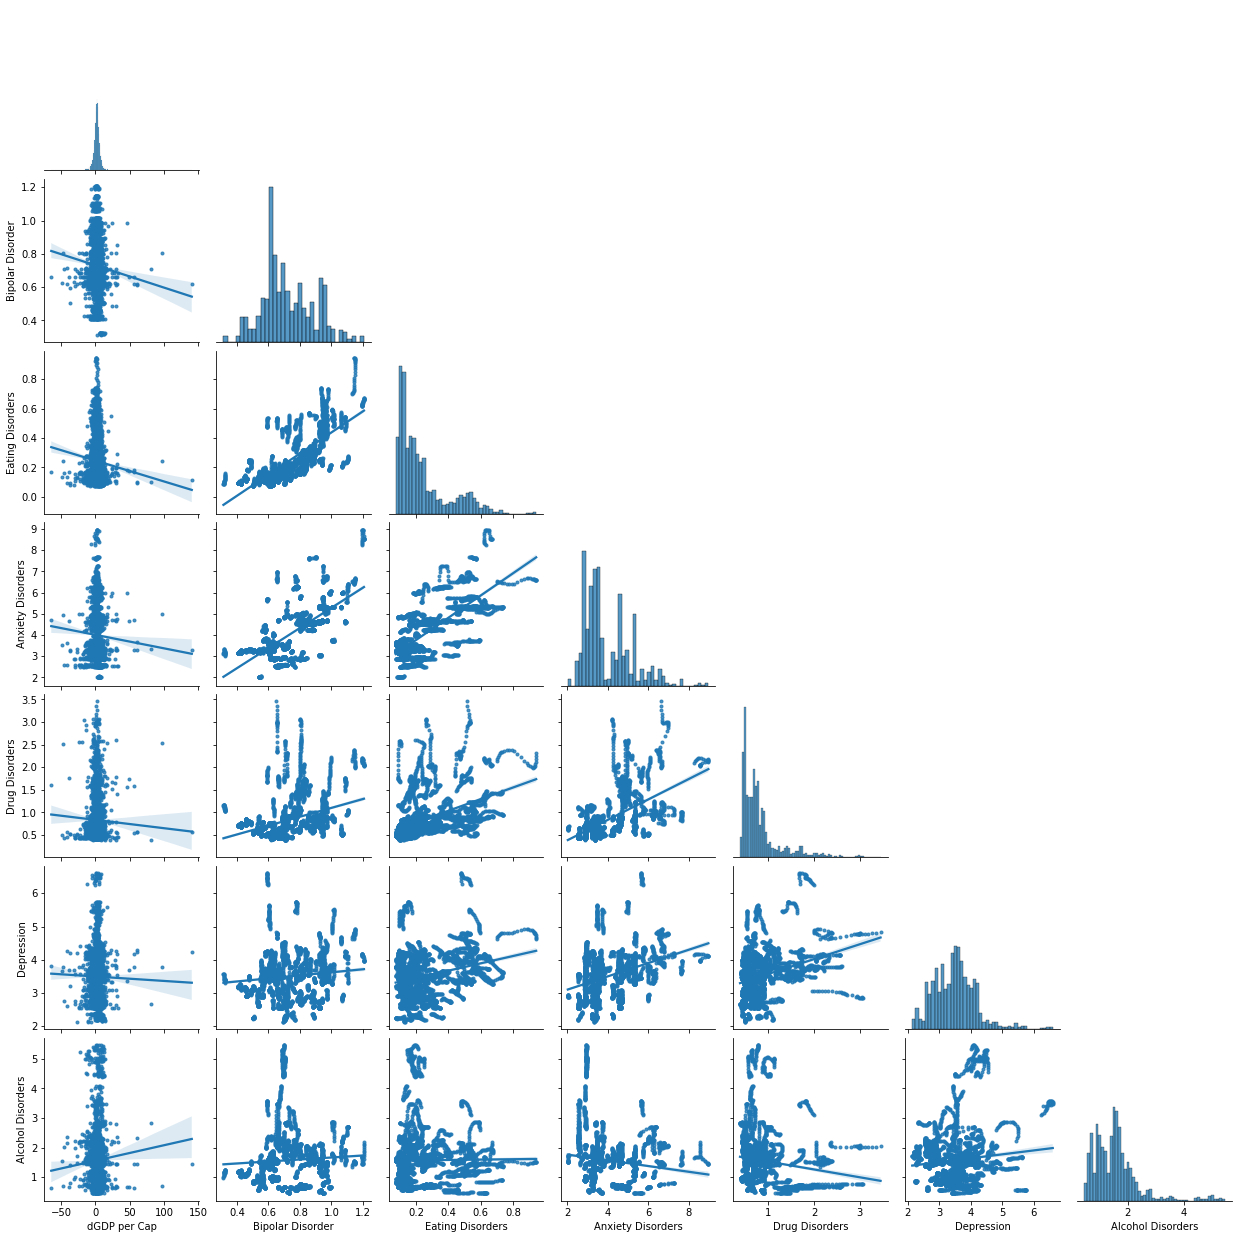

In [15]:
variables = ['dGDP per Cap', 'Year', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Disorders', 'Depression', 'Alcohol Disorders']
sns.pairplot(merge_emg_data[variables], markers = '.', kind='reg', diag_kind='hist', corner=True)
plt.show()

- Based on the scattor plot matrix we see no visual correlation between change in GDP across any year and mental disorders. There is some correlation between the mentall illnesses themselves however those factors are not relevant to our question. Our next step will proceed with seeing if there is a trend over time with the GDP and the mental ilnesses. 

- We also want to look into specific continents rather than countries to see if there is a closer trend.
- An interactive plot would allow us to visualize multiple variables such as Year and select between viewing the different mental disorders individually

#### Double click on a Region in the legend to only display that region.
#### Click on Regions to toggle display on or off.
#### Graph is interactive and zoomable/scalable.
#### Click and drag on the plot to zoom in on an area
#### Hover over graph data points to view more details about each point

In [16]:
fig = px.scatter(data_frame=merge_emg_data, x='dGDP per Cap', y='Depression', color='Region',
                 animation_frame='Year', title='Correlation between dGDP per Cap and Depression by Region Over Time')

fig.update_layout(yaxis_title='')

#Set animation settings with a single play button
fig.update_traces(marker=dict(size=8))
fig.update_layout(updatemenus=[
    dict(type='buttons', showactive=False, buttons=[dict(label='Play',
                                            method='animate', args=[None, dict(frame=dict(duration=500, redraw=True)),
                                                                    dict(fromcurrent=True, frame=dict(duration=1000, redraw=True))])]),
    dict(type='dropdown', showactive=False, buttons=[
        dict(label=col, method='update', args=[{'y': [merge_emg_data[col]]}, {'title': f'Correlation between dGDP per Cap and {col} by Region Over Time', 'yaxis_title': col}]) for col in ['Schizophrenia', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Disorders', 'Depression', 'Alcohol Disorders']
    ])
])

#This line toggles autoscaling for the animation, uncomment it to turn off autoscaling.
#fig.update_yaxes(range=None)
fig.show()


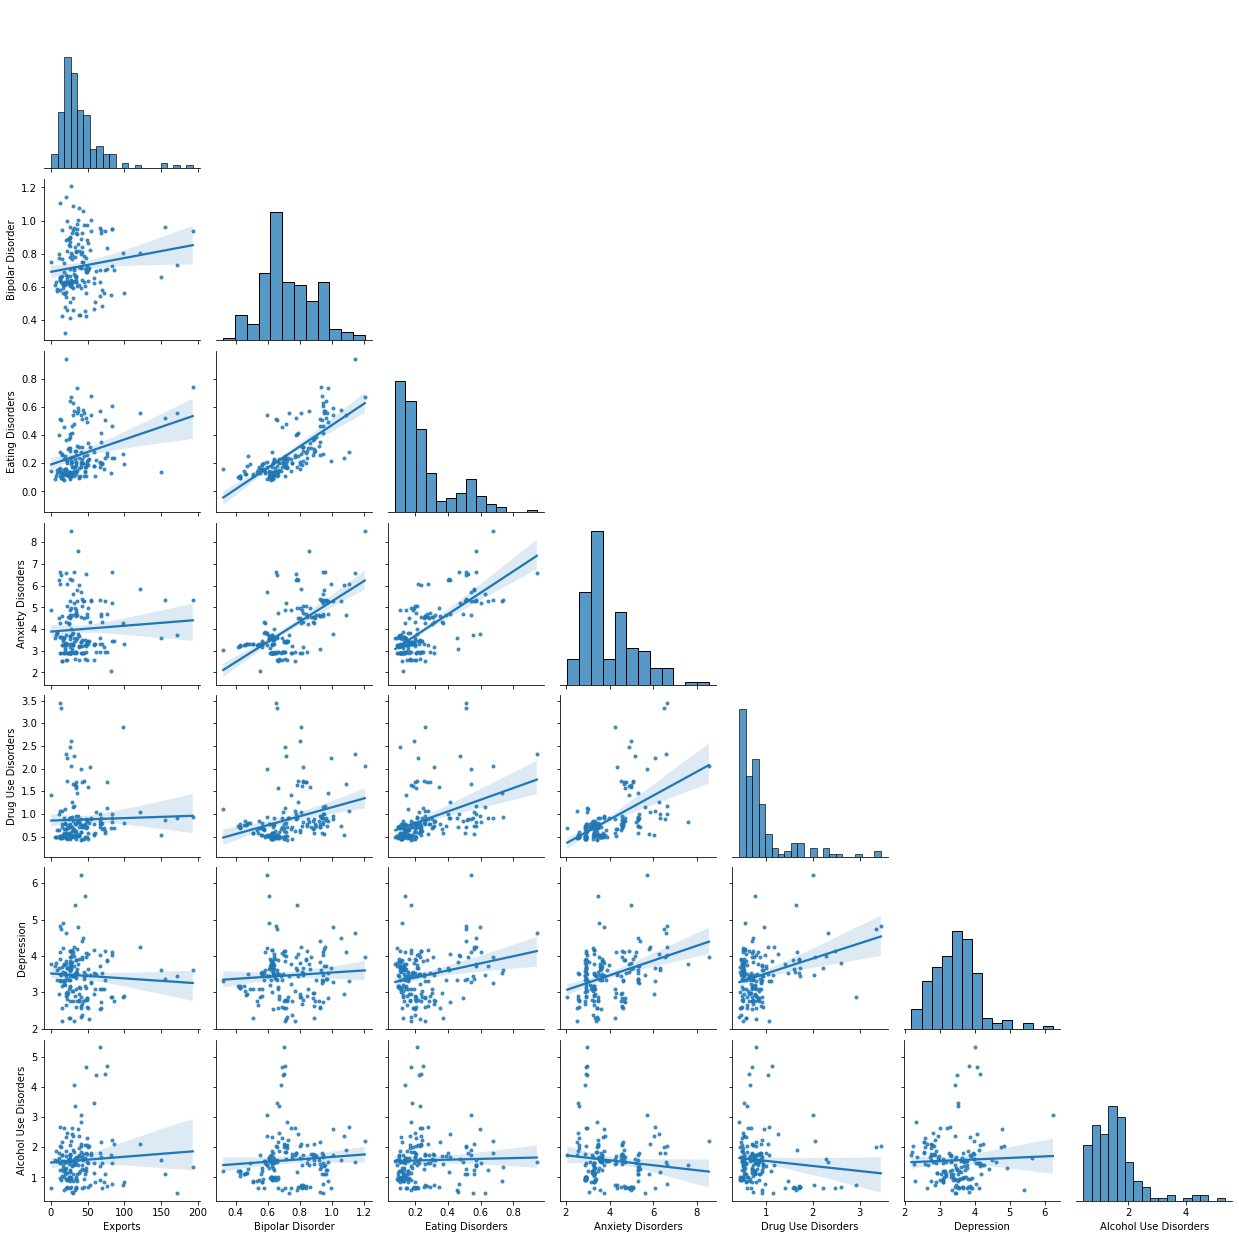

In [17]:
# scattor plot matrix 
variables = ['Exports', 'Year', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Use Disorders', 'Depression', 'Alcohol Use Disorders']
sns.pairplot(merge_xm_data[variables], markers = '.', kind='reg', diag_kind='hist', corner=True)
plt.show()

In this plot we wanted to see if there was any correlation between exports of goods and services and the mental illnesses. Based on these plots we can see some correlation with Bipolar disorder and Anxiety disorders with Export data. Since there is not a clear understanding of the visual representation we will look into the pearson correlation.

In [18]:

variables = ['Exports', 'Year', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Use Disorders', 'Depression', 'Alcohol Use Disorders']
subset = merge_xm_data[variables]
corr_matrix = subset.corr()

print(corr_matrix)

                        Exports  Bipolar Disorder  Eating Disorders  \
Exports                1.000000          0.144831          0.300176   
Bipolar Disorder       0.144831          1.000000          0.733445   
Eating Disorders       0.300176          0.733445          1.000000   
Anxiety Disorders      0.065864          0.656049          0.720839   
Drug Use Disorders     0.029117          0.298949          0.406848   
Depression            -0.060610          0.074043          0.260185   
Alcohol Use Disorders  0.067314          0.080252          0.027578   

                       Anxiety Disorders  Drug Use Disorders  Depression  \
Exports                         0.065864            0.029117   -0.060610   
Bipolar Disorder                0.656049            0.298949    0.074043   
Eating Disorders                0.720839            0.406848    0.260185   
Anxiety Disorders               1.000000            0.572474    0.372716   
Drug Use Disorders              0.572474           

Since there was ambigious visual correlation. We looked into the pearson correlations and see that there is minimal correlation as well. We will proceed to see whether other factors have an impact on mental illnesses and complete an overall conclusion including many factors. 

## Conclusion


From our analysis of the relationship between GDP growth and the mental illnesses on countries around the world, we observe that from our visualizations and analysis that there is little correlation between the change in GDP over time and mental illnesses. We proceeded to examine our conclusion with scattor plots which demonstrated the growth of GDP and the mental ilnesses divided into continents. We hoped to see trends in mental illness rates vs. GDP growth when grouped as continents, however we came to the same conclusion. We proceeded to analyze the employment rate data for countries and the mental illnesses. We observed that there was little correlation between the employment rate and the mental illnesses. We expected to see some correlation since the amount of services available may correspond to whether someone is getting their needs met. Furthermore, although we do not see strong correlation between the socio economic factors we will still continue analysis on which factors have a stronger correlation with the mental illnesses. 


### Impacts
The impact of our conclusion is that a country's GDP growth, Employment rates, and Export data does not necessarily affect the mental status of it's citizens. It is reasonable to say that the economic standing of a country is not related to policy planning for mental health support. 


### Future 
We should investigate other societal factors that relate to mental illnesses across the countries. We want to consider PCA to identify which societal variables are most important for predicting the rates of mental illness, by identifying the principal components that explain the greatest amount of variance in the data.



# Question 2:

Is there a significance association between well-being and global mental disorder rate?

### Motivation:

Mental disorders affect both physical and mental health which can affect a person's whole lifestyle. Looking at the wellbeing of citizens of a country is vital way of seeing the physiological factors that impact mental illness. We are going to look at the various aspects of wellbeing such as happiness, education enrollment, and life expectancy.

### Methods:

Our method for analysis is by viewing correlation matrices and visualizing that data on a heatmap with labeled correlation values. This provides a straightforward conclusion about which factors are most related to our response variable.

# Analysis :

### Data:

We have obtained a dataset with the percentages of different mental disorders in 147 different countries around the world. The mental disorders we are evaluating are schizophrenia, bipolar disorder, eating disorders, depression, and alcohol use disorders. We are merging another dataset that contains the happiness score of each country. The happiness score is one of the most important indicators in this question. The Happiness score is computed with values of each country containing GDP, Family, Health, Freedom, Generosity, and Government Corruption. Both datasets were obtained from kaggle. We are merging a life expectancy and educational enrollment dataset as well.

## Data Cleaning and Processing for Q2

In [19]:
df_2017 = pd.read_csv('2017.csv')
df_2017['Year'] = '2017'
df_2017 = df_2017.rename(columns={'Happiness.Rank': 'Happiness Rank',
                                  'Happiness.Score': 'Happiness Score',
                                  'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                                  'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                                  'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                                  'Dystopia.Residual': 'Dystopia Residual'})

column_names_2017 = df_2017.columns.tolist()

combined = df_2017

In [20]:
merged_data = mental_health_data
merged_data = pd.merge(merged_data, combined, on=["Country", "Year"])

#dropping columns 
merged_data = merged_data.drop(['Economy (GDP per Capita)', 'Family', 'Dystopia Residual', 
                                'Happiness Rank', 'Whisker.low', 'Whisker.high'], axis=1)



In [21]:
quant = merged_data.loc[:, merged_data.columns[4:].tolist()]

# standardize the selected columns 
norm = (quant - np.mean(quant)) / np.std(quant)

merged_data.loc[:, merged_data.columns[4:].tolist()] = norm

In [22]:
data = {'Bipolar Disorder': merged_data['Bipolar Disorder'].corr(merged_data['Happiness Score']),
        'Eating Disorder': merged_data['Eating Disorders'].corr(merged_data['Happiness Score']),
        'Anxiety Disorder': merged_data['Anxiety Disorders'].corr(merged_data['Happiness Score']),
        'Drug Use Disorder': merged_data['Drug Use Disorders'].corr(merged_data['Happiness Score']),
        'Depression': merged_data['Depression'].corr(merged_data['Happiness Score']),
        'Alcohol Use Disorders': merged_data['Alcohol Use Disorders'].corr(merged_data['Happiness Score']),
        'Schizophrenia': merged_data['Schizophrenia'].corr(merged_data['Happiness Score'])}

df = pd.DataFrame(data, index=['Correlation with Happiness Score'])
df = df.T


In [23]:

healthy = pd.read_csv('healthy_life.csv')
healthy = healthy.rename(columns={'Unnamed: 0':'Country',
                                 'Unnamed: 1': 'Year', 
                                 'Healthy life expectancy (HALE) at birth (years)': 'Healthy life expectancy (at birth)'})

In [24]:
enrollment = pd.read_csv('enrollment.csv')

In [25]:
merge_enrollment = mental_health_data.copy()
merge_enrollment['Year']=merge_enrollment['Year'].astype(int)

merge_enrollment = pd.merge(merge_enrollment, enrollment, on=["Country", "Year"])
merge_enrollment = merge_enrollment.drop(['index', 'Country Code_x', 'Year', 'Country Code_y'], axis=1)

## Analysis

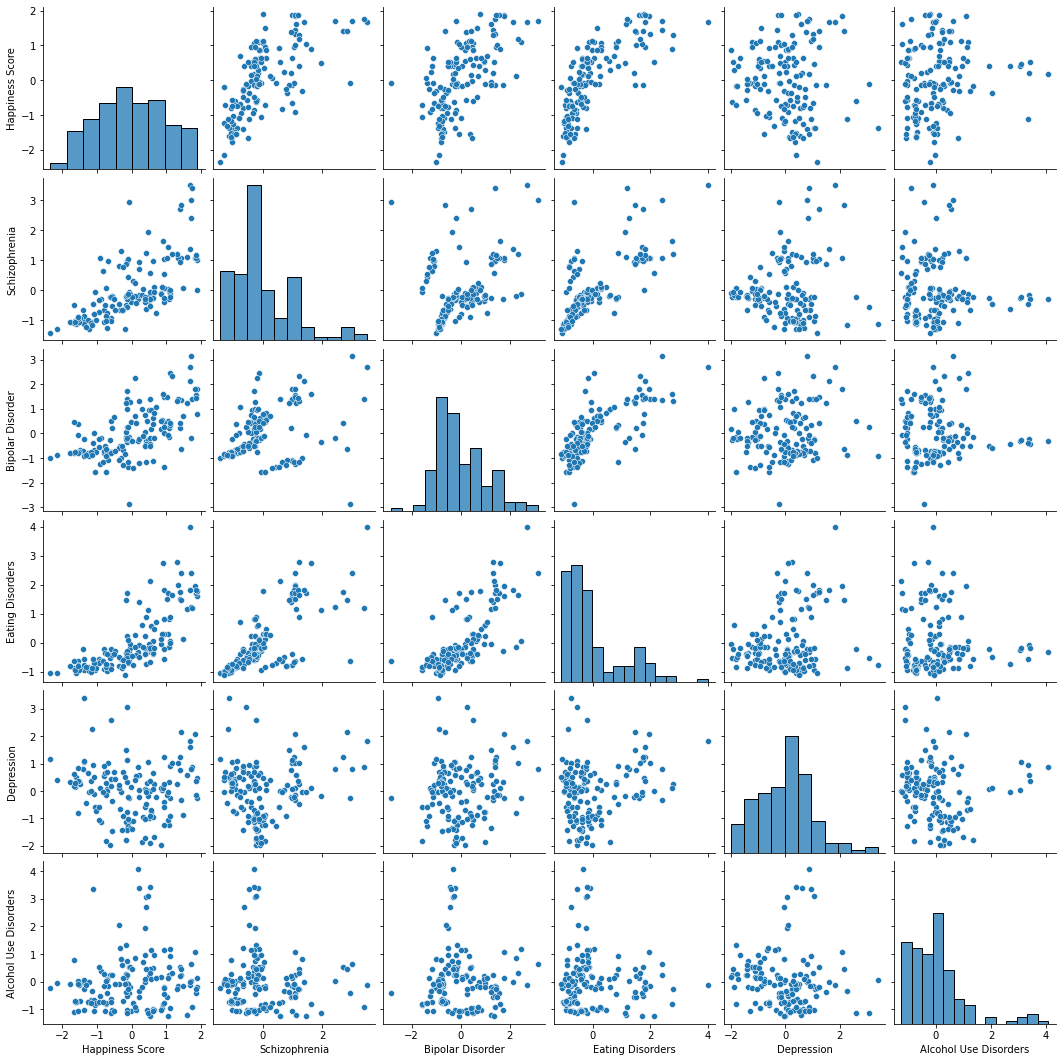

In [26]:
# pairplot code
sns.pairplot(merged_data, vars=['Happiness Score', "Schizophrenia",'Bipolar Disorder', 'Eating Disorders', 'Depression', 'Alcohol Use Disorders'])

<AxesSubplot:>

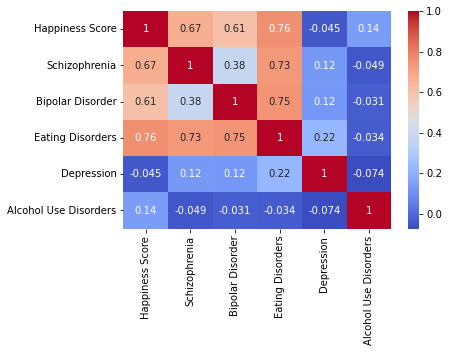

In [27]:
corr_matrix = merged_data[['Happiness Score', "Schizophrenia", 'Bipolar Disorder', 'Eating Disorders', 'Depression', 'Alcohol Use Disorders']].corr()

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)


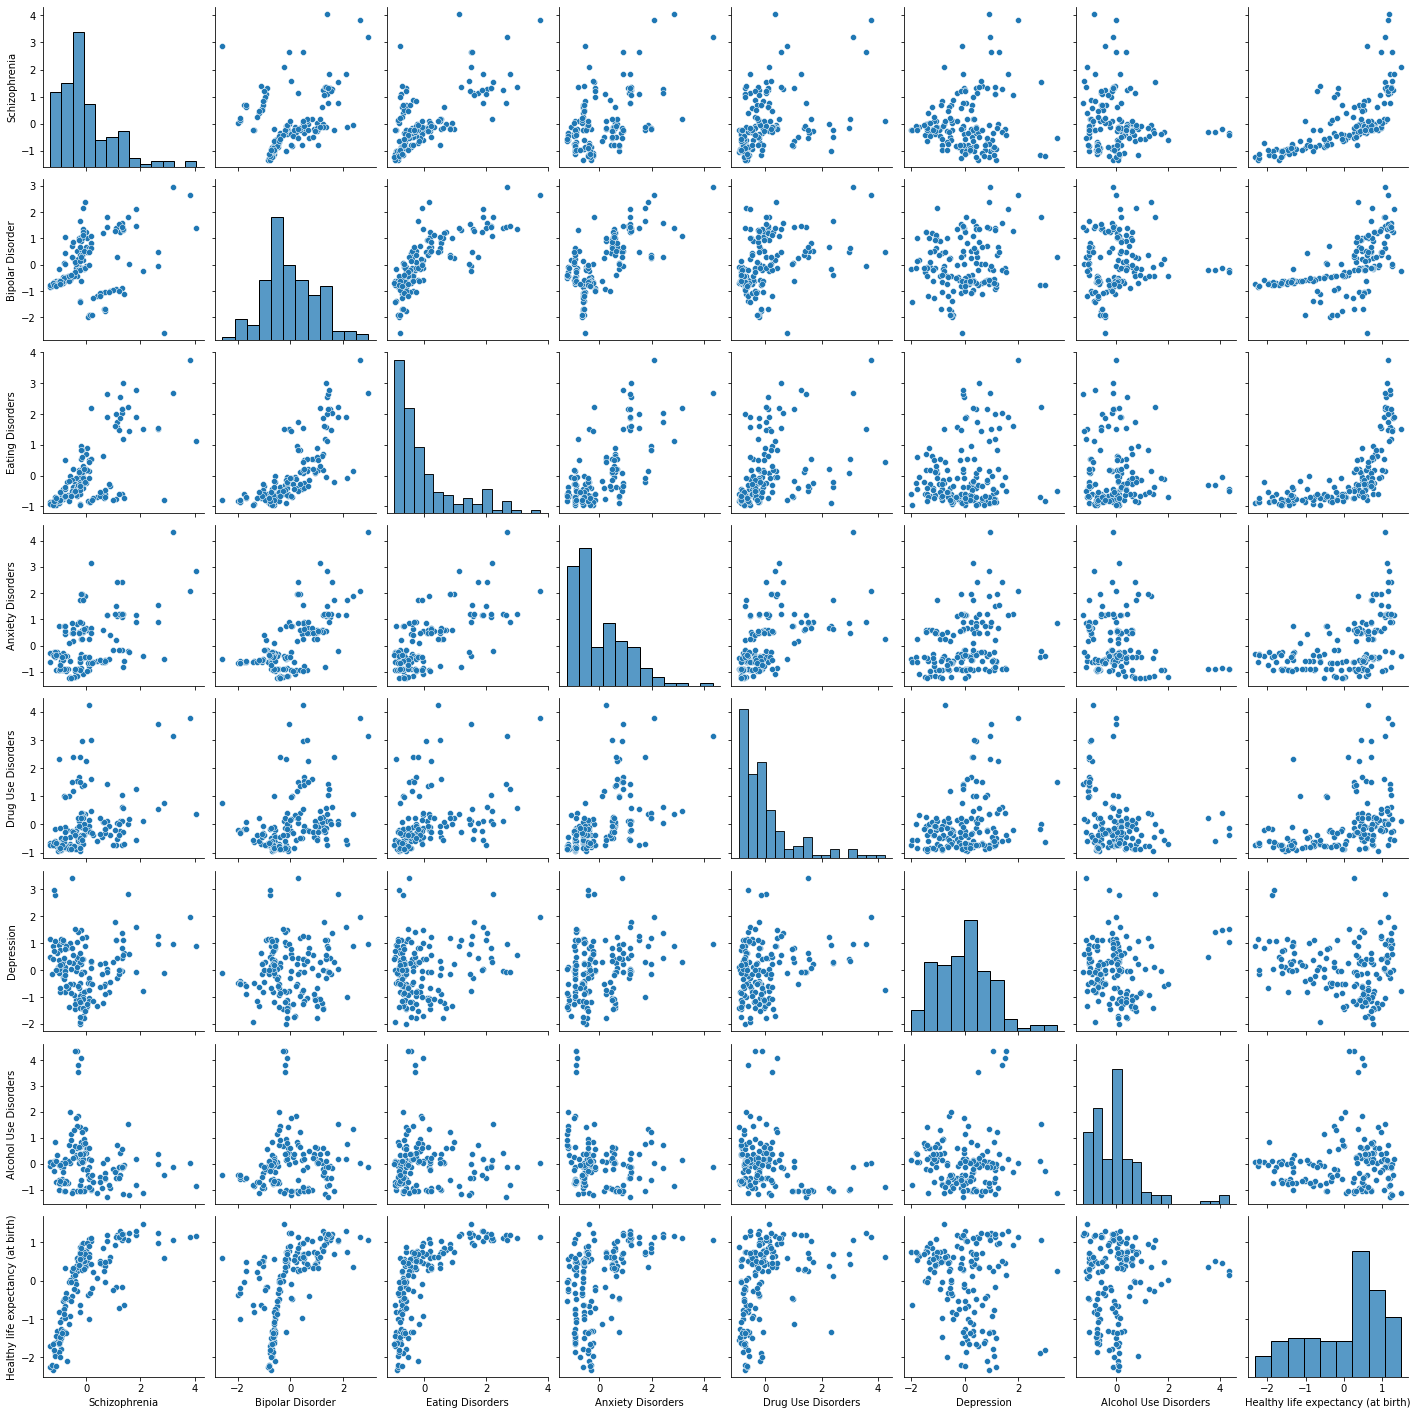

In [28]:
merge_healthy = mental_health_data.copy()

merge_healthy = pd.merge(merge_healthy, healthy, on=["Country", "Year"])
merge_healthy = merge_healthy.drop(['index', 'Country Code', 'Year'], axis=1)

merge_healthy
merge_healthy_normalized = merge_healthy.copy()

cols_to_normalize = ['Schizophrenia', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Use Disorders', 'Depression', 'Alcohol Use Disorders', 'Healthy life expectancy (at birth)']

scaler = StandardScaler()
merge_healthy_normalized[cols_to_normalize] = scaler.fit_transform(merge_healthy_normalized[cols_to_normalize])

sns.pairplot(merge_healthy_normalized)


<AxesSubplot:>

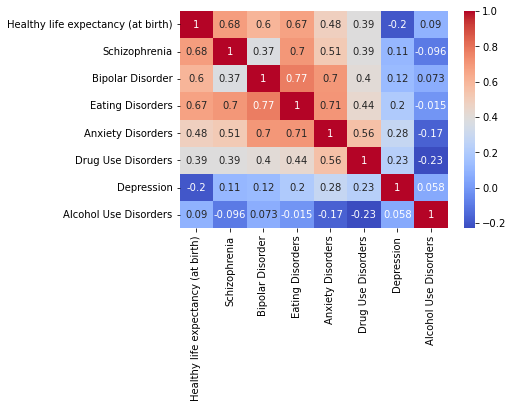

In [29]:
heat_health = merge_healthy_normalized[['Healthy life expectancy (at birth)', 'Schizophrenia', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Use Disorders', 'Depression', 'Alcohol Use Disorders']].corr()
sns.heatmap(heat_health, cmap='coolwarm', annot=True)


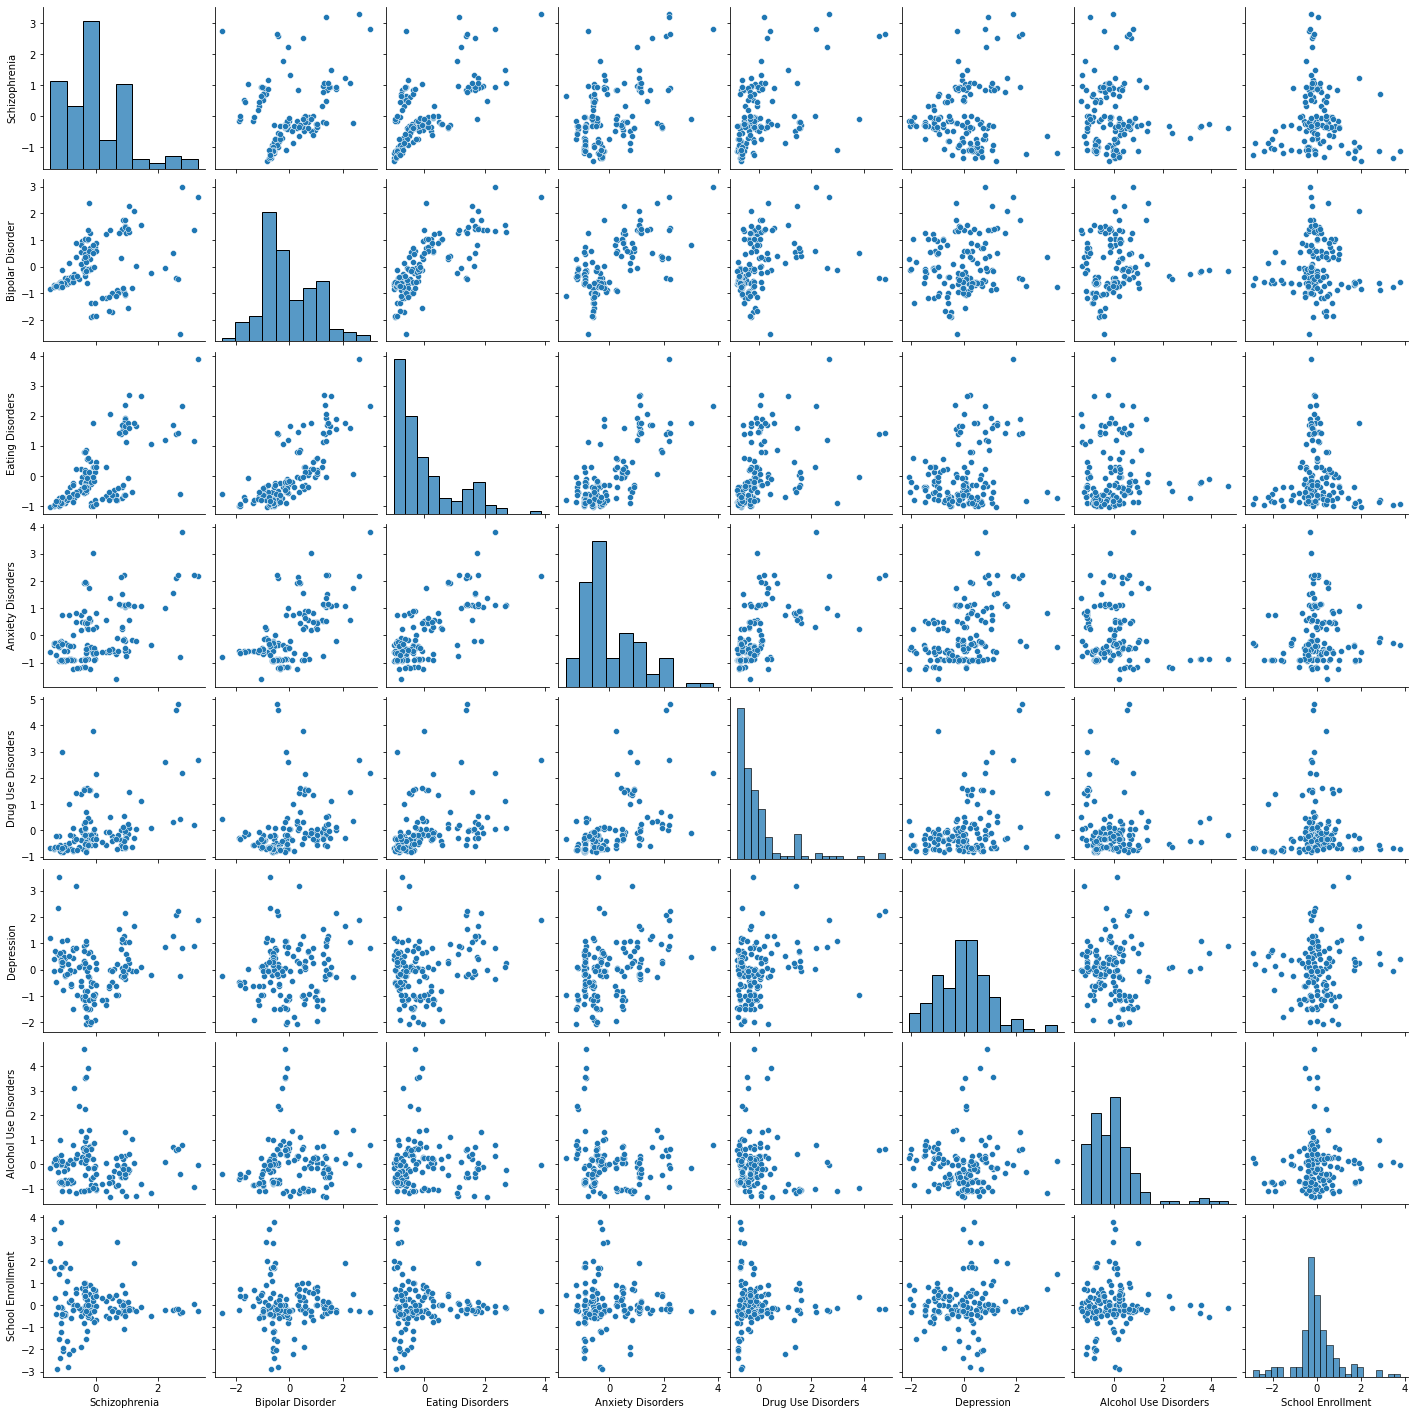

In [30]:
merge_enrollment_normalized = merge_enrollment.copy()
cols_to_normalize = ['Schizophrenia', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Use Disorders', 'Depression', 'Alcohol Use Disorders', 'School Enrollment']
scaler = StandardScaler()
merge_enrollment_normalized[cols_to_normalize] = scaler.fit_transform(merge_enrollment_normalized[cols_to_normalize])
sns.pairplot(merge_enrollment_normalized)


<AxesSubplot:>

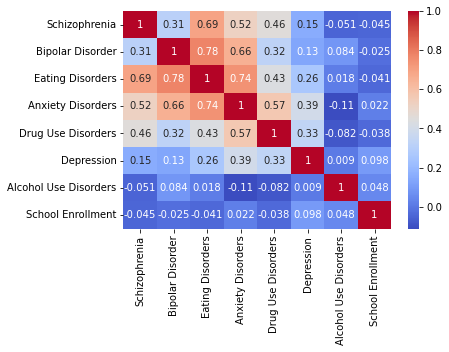

In [31]:
heat_enrollment = merge_enrollment_normalized[['Schizophrenia', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Use Disorders', 'Depression', 'Alcohol Use Disorders', 'School Enrollment']].corr()
sns.heatmap(heat_enrollment, cmap='coolwarm', annot=True)

## Conclusion:
From the pearson correlation plots we have collected; we can see the correlation between happiness score, healthy life expectancy, and school enrollment on certain mentall illnesses. We can see there is a high correlation between a happiness score of a country, schizophrenia, bipolar disorder, and eating disorder rates. Healthy life expectancy also has a high correlation with the same mental illnesses along with anxiety disorders. School enrollment had a low correlation rate with every mental illness. We were surprised about this outcome and evaluate if there is an issue with the dataset or if that is accurate. Although correlation doesn't equal causation, this analysis gives insight into different factors that could potentially have an influence on certain mental illnesses.

# Question: 
What is the effect of enviornmental factors on the mental illnesses in countries?

## Motivation: 
The EPI includes indicators related to various aspects of the environment, such as air quality, water quality, biodiversity and habitat, climate and energy, and agriculture. The EPI variable tells us how well a country is performing in terms of its environmental policies and outcomes, relative to other countries. A higher EPI score indicates better environmental performance, while a lower score indicates poorer environmental performance. EPI may be a factor that could affect mental illnesses because of daily lifestyles. The motivation for the analysis of this factor and mental illnesses is to see whether there is any correlation of the environmental factors on the mental illnesses in countries. 


## Methods: 
In order to analyze the environmental factors effects we will check the correlation between this factor and the mental illnesses in many countries in 2017. This will give us a visual representation of the effects of the variables on the mental illnesses.


# Analysis :

### Data:

We obtained this data from yale EPI records. The data presented includes a EPI index which is an overall view of a countries environmental status. The EPI is based on a wide range of environmental indicators that reflect the current state of the environment, the pressures on the environment, and the policy responses of countries to environmental challenges. We believe that this could be an influence on a persons mental well-being. Our analysis will deepen our understanding on this relationship.



In [32]:
epi = pd.read_csv('epi2022results05302022.csv')
epi = epi.iloc[:, :5]
epi = epi.rename(columns = {"country" : "Country", "EPI.new" : "EPI"})
epi["Year"] = 2017

In [33]:
merge_epi = mental_health_data.copy()
merge_epi['Year']=merge_epi['Year'].astype(int)

merge_epi = pd.merge(merge_epi, epi, on=["Country", "Year"])
merge_epi = merge_epi.drop(['index', 'Country Code', 'Year', 'code', 'iso', 'region'], axis=1)

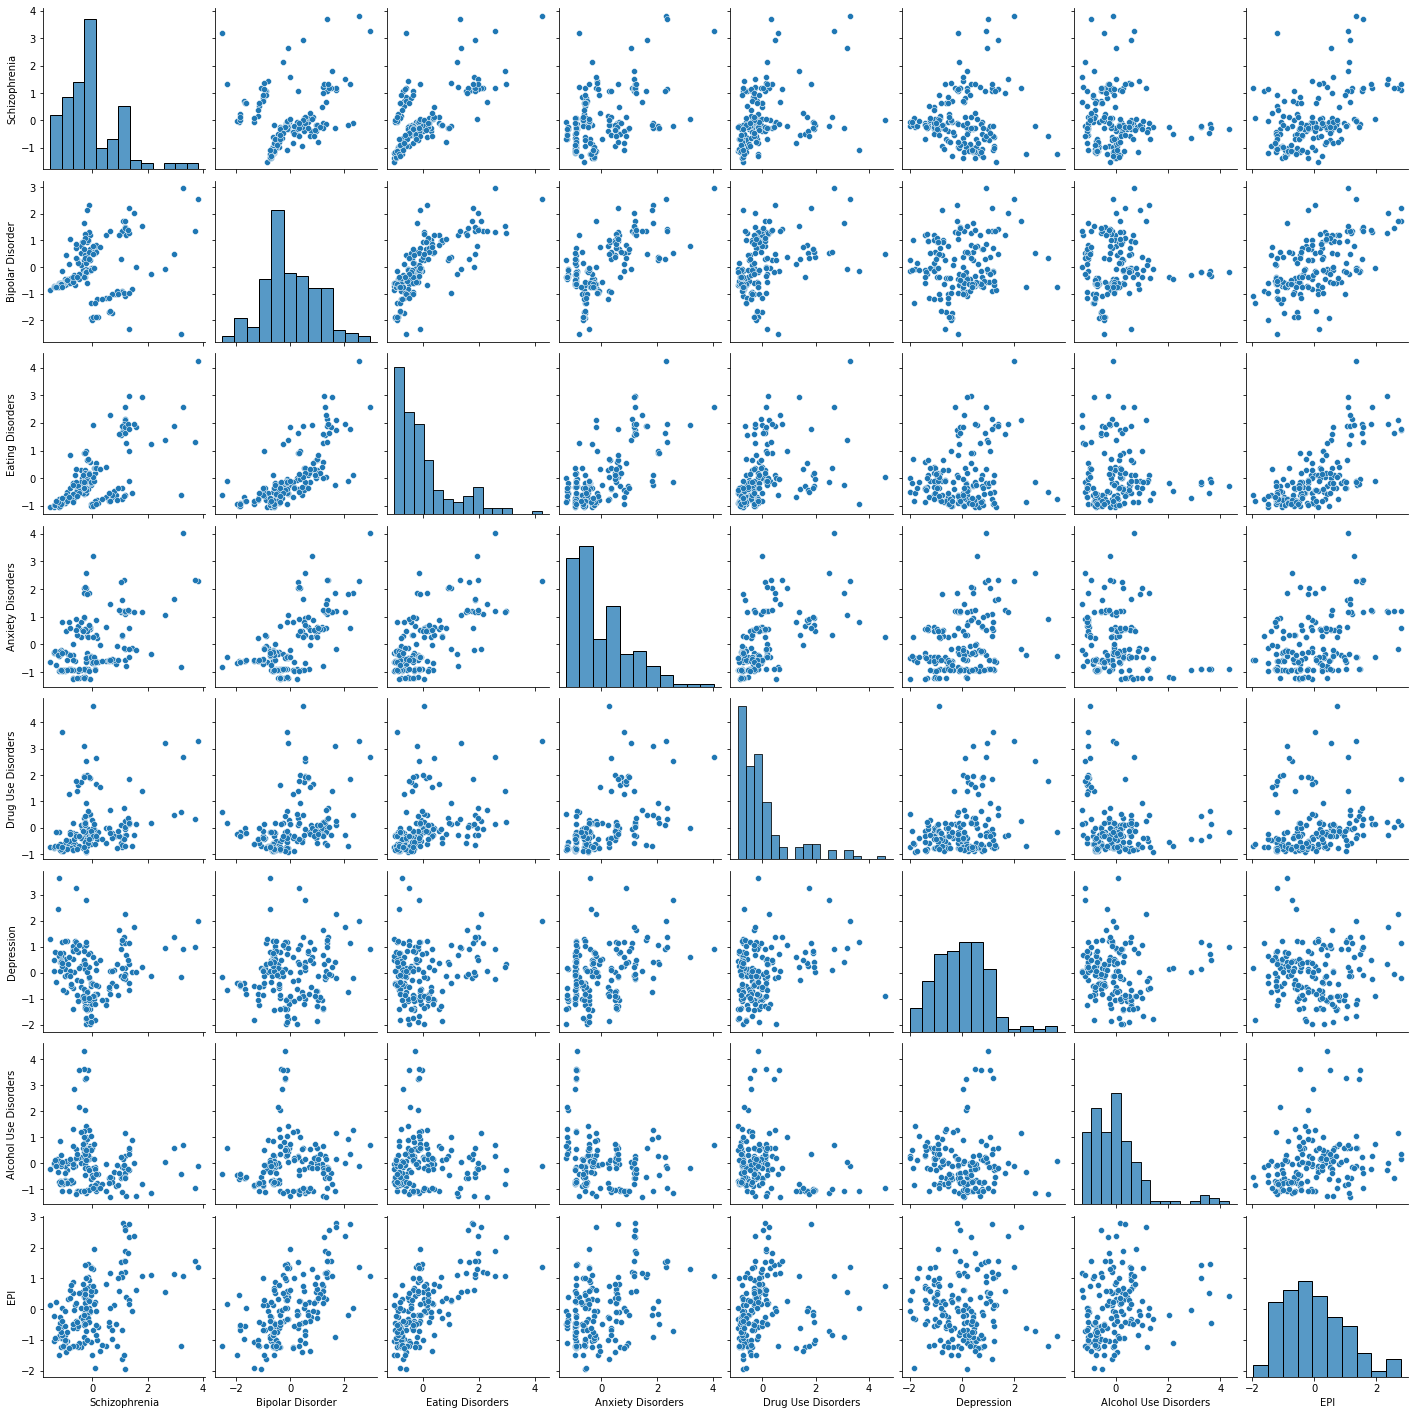

In [34]:
merge_epi_normalized = merge_epi.copy()

cols_to_normalize = ['Schizophrenia', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Use Disorders', 'Depression', 'Alcohol Use Disorders', 'EPI']

scaler = StandardScaler()
merge_epi_normalized[cols_to_normalize] = scaler.fit_transform(merge_epi_normalized[cols_to_normalize])

sns.pairplot(merge_epi_normalized)

<AxesSubplot:>

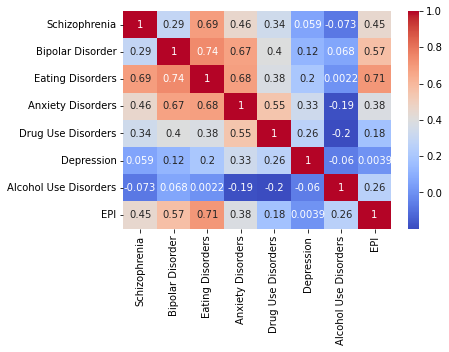

In [35]:
heat_epi = merge_epi_normalized[['Schizophrenia', 'Bipolar Disorder', 'Eating Disorders', 'Anxiety Disorders', 'Drug Use Disorders', 'Depression', 'Alcohol Use Disorders', 'EPI']].corr()
sns.heatmap(heat_epi, cmap='coolwarm', annot=True)

### Conclusion
From our analysis, we can see that happiness is highly correlated with multiple mental disorders.
Looking at both the Pearson correlation datatable and the heatmap we can conclude happiness is most correlated with schizophrenia, bipolar disorder, and eating disorders out of all the mental disorders due to their higher correlations. The correlation matrix shows the relationship between happiness, schizophrenia, bipolar disorder, eating disorder, depression, and alcohol use disorders. From the matrix, you can see the high correlation between happiness with schizophrenia, bipolar disorder, and eating disorders again. Based on the interactive barchart, you can see that the happiness score relationship between the mental health indicators have a consistent pattern throughout most countries. We also analyzed the enrollment for school and saw little correlation between this factor. This means that we may not have the entire outlook on the education data. In addition we explored the life expactency to see whether there was any correlation. We used similar methods to analyze the variables and found minimal correlation with enrollment and life expectancy. 


### Impacts
From the original dataset, the data counted for the percentage of people in countries with disorders. Meaning this would produce an inverse correlation because the higher a mental disorder goes up, the lower the happiness will be. People with schizophrenia, bipolar disorder, and eating disorder have a significant struggle with happiness compared to the other disorders. We found that enrollment data didn't have much correlation as well as life exepectancy. 

### Future
Since we now know happiness is a big physiological indicator in mental disorder as it has sub indicators (Family, Health, Freedom, Generosity, and Government Corruption) that provide a big understanding of the well being of individuals in countries, we can dive deeper into physical wellness indicators such as healthcare of a country, overall health, diet/nutrition, and other indicators that can also impact the mental well being of individuals in a country. We can also look into numerous other factors that contribute to the well-being of an individual since we cannot generalize the well-being with just these individual factors. 

# Question:

If we analyze all the factors together, which countries/regions will have similarities in mental health rates, and are we able to predict the mental health rates for these regions based on our societal factors?

### Motivation:

We want to see if knowing the traits and success factors of a country will allow us to determine the mental health rate because this allows different locations to determine the amount of governmental assistance and aid that a location may require for adequant coverage.

### Methods:

We consolidated our mental health data for each disease into a normalized mean mental health rate, then combined all of our factors into a cumulative dataset. We perform PCA to diminish the dimensions into 3 dimension so we can visualize the clusters and determine the differences/distances within regional/country data points. 

# Analysis :

## Data
The data used a combined dataset of all the datasets above.

In [36]:
print(len(merge_emg_data_merge))
merged_df = pd.merge(data_2017[['Country', 'Employment-Rate', 'Mental Health Mean']], merge_emg_data_merge[['Country', 'GDP']],  on='Country')
merged_df = pd.merge(merged_df, merge_enrollment[['School Enrollment', 'Country']] , on='Country')
merged_df = pd.merge(merged_df, merge_epi[['EPI', 'Country']] , on='Country')
merged_df = pd.merge(merged_df, merge_healthy[['Healthy life expectancy (at birth)', 'Country']] , on='Country')
merged_df = pd.merge(merged_df, merged_data[['Happiness Score', 'Country']] , on='Country')
merged_df = pd.merge(merged_df, export_data[['Exports', 'Country']] , on='Country')
merged_df = pd.merge(merged_df, country_data[['Region', 'Country']] , on='Country')
merged_df['Healthy life expectancy (at birth)'] = merged_df['Healthy life expectancy (at birth)'].astype(float)

166


In [37]:
selected_cols = merged_df.iloc[:, 1:-1]
scaler = StandardScaler()
merged_df.iloc[:, 1:-1] = scaler.fit_transform(selected_cols)

In [38]:
from sklearn.decomposition import PCA

merged_df_columns = merged_df.copy()
cols_to_include = ['Employment-Rate', 'Mental Health Mean', 'GDP', 'School Enrollment', 'EPI', 'Healthy life expectancy (at birth)', 'Happiness Score', 'Exports']
merged_df_columns = merged_df_columns[cols_to_include]

# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(merged_df_columns)
pca = PCA(n_components=3)
pca.fit(data_std)
data_pca = pca.transform(data_std)
df_pca = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2', 'PCA3'])
df_pca['Region'] = merged_df['Region']
df_pca['Country'] = merged_df['Country']

# variance ratio for each principal component
print('Explained variance ratio:', pca.explained_variance_ratio_)


Explained variance ratio: [0.39346935 0.14892601 0.13473899]


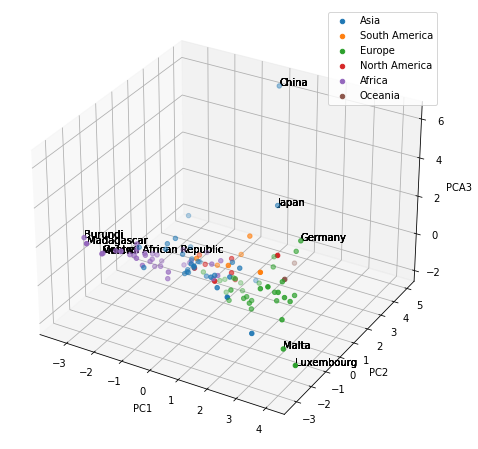

In [39]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
regions = df_pca['Region'].unique()
for region in regions:
    x = df_pca[df_pca['Region'] == region]['PC1']
    y = df_pca[df_pca['Region'] == region]['PC2']
    z = df_pca[df_pca['Region'] == region]['PCA3']
    ax.scatter(x, y, z, label=region)
    
    outlier = 1.2
    for i, country in enumerate(df_pca['Country']):
        if (abs(df_pca.iloc[i]['PC1'])**2 + abs(df_pca.iloc[i]['PC2'])**2 + abs(df_pca.iloc[i]['PCA3'])**2 > 11):
            ax.text(df_pca.iloc[i]['PC1'], df_pca.iloc[i]['PC2'], df_pca.iloc[i]['PCA3'], country)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PCA3')
ax.legend()
plt.show()


In [40]:
import plotly.graph_objs as go

fig = go.Figure()

regions = df_pca['Region'].unique()
for region in regions:
    x = df_pca[df_pca['Region'] == region]['PC1']
    y = df_pca[df_pca['Region'] == region]['PC2']
    z = df_pca[df_pca['Region'] == region]['PCA3']
    fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers', name=region, 
                               text=df_pca[df_pca['Region'] == region]['Country']))

fig.update_layout(scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PCA3'),
                  margin=dict(l=0, r=0, b=0, t=0),
                  legend=dict(x=0, y=1))

fig.show()


Text(0, 0.5, 'Inertia')

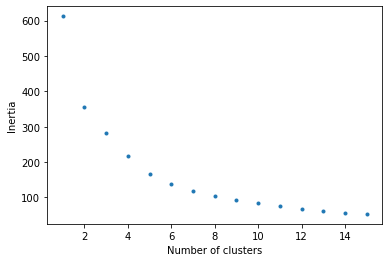

In [41]:
from sklearn import cluster
inertias = []
kmeansobs = []
for nc in range(15): 
    km = cluster.KMeans(n_clusters=nc+1)
    labels = km.fit_predict(df_pca[['PC1','PC2', 'PCA3']])  # execute kmeans algorithm here
    df_pca[f'Cluster_{nc+1}'] = labels
    df_pca
    inertias.append(km.inertia_) # keep track of inertias
    kmeansobs.append(km) # save the kmeans object for later use
plt.plot(range(1,1+len(inertias)), inertias, '.')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


The graph above is representing the interia for each cluster. We chose to explore 14 clusters to prioritize the interpretatiion of the clusters which is more important than potentially overfitting.

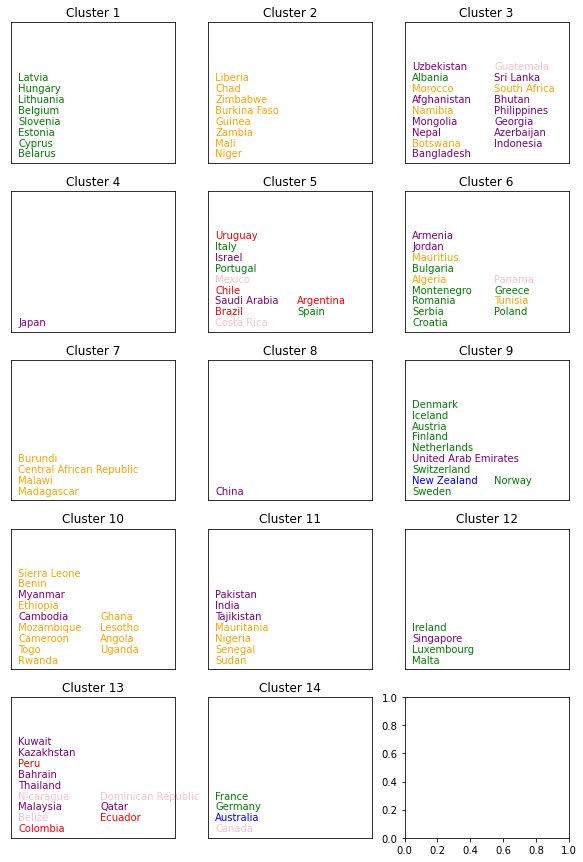

In [42]:
# explore the distribution of countries and regions with each cluster for 14 clusters
fig, ax = plt.subplots(5,3, figsize=(10,15))
regiondict = {"Africa": 'orange', "Europe":"green", "North America":'pink', 'Asia':'purple', 'South America':'red', 'Oceania':'blue'}
for i in range(14): 
    temp = df_pca[df_pca.Cluster_14 == i]
    #print("Cluster", i, '\ncountries:',temp.Country.unique(),'\nregions:', temp.Region.unique(),  '\n')
    #print('')
    ax[i//3][i%3].set_title(f'Cluster {i+1}')
    counter = 0 
    for j,country in enumerate(temp.Country.unique()) :
        x_place = 1
        y_place = j*.085+1
        if counter>8: 
            if i==11: x_place+=.4
            else: x_place+=.55
            y_place -= 8*0.085
        
        ax[i//3][i%3].text(x_place, y_place,country, {'color': regiondict.get(temp.iloc[j]['Region'])})
        ax[i//3][i%3].plot([1,2], [2,1],color='white')
        ax[i//3][i%3].set_xticks([])
        ax[i//3][i%3].set_yticks([])
        counter += 1
        

The visual above shows what contries are located in the same cluster. From this, we see that: 
* Countries in Africa tend to be grouped with many other contries in africa, while countries in Asia tend to be grouped with many other regions
* There are many surprising combinations, such as Ireland and Singapore being in the same cluster, which can also lead to future questions such as investigating factors outside of what we have reviewed in this report. 

In [43]:
from sklearn import linear_model
import sklearn.model_selection

X = merged_df.select_dtypes(np.number)
Y = X['Mental Health Mean']
X = X.drop('Mental Health Mean', axis=1)

(x_train, x_test, y_train, y_test) = sklearn.model_selection.train_test_split(X, Y, test_size=0.35)
from sklearn import svm

regression = svm.SVR()
regression.fit(x_train,y_train)
output = pd.DataFrame({'Actual':y_test})
output['SVR Predicted'] = regression.predict(x_test)
lr = linear_model.LinearRegression()
lr.fit(x_train,y_train)
lr.coef_
output['Linear Predicted'] = lr.predict(x_test)

In [44]:
svr_mse = sklearn.metrics.mean_squared_error(y_test, output['SVR Predicted'])
lin_mse = sklearn.metrics.mean_squared_error(y_test, output['Linear Predicted'])
svr_var = sklearn.metrics.explained_variance_score(y_test, output['SVR Predicted'])
lin_var = sklearn.metrics.explained_variance_score(y_test, output['Linear Predicted'])
print('Mean Squared Error for SVR:', svr_mse, "\nMean Squared Error for Linear:", lin_mse, "\nExplained Variance for SVR", svr_var, '\nExplained Variance for Linear:', lin_var)

Mean Squared Error for SVR: 0.7302070772230108 
Mean Squared Error for Linear: 0.6154534872617224 
Explained Variance for SVR 0.12273026326841352 
Explained Variance for Linear: 0.2607337591762011


We chose mean squared error and explained variance as our metrics because mean squared error is a standard metric for continuous regressions, and the explained variance shows the extent at which the mental health can be predicted by our given factors. The mean squared error metrics show that both models have an average squared error of 0.6, which can be be interpreted as a squared standard deviation since the data was normalized. The explaind variances are around 30% and 40% respectively, which tells us that while these factors have some correlation to the mental health of a country, there are other factors that account to approximately 60-70% of the mental health of a country



## Conclusion
Overall througout the analysis we found that the mental health rates have limited correlation with the socio economic, well-being, and envioronmental factors. This shows us that there are other variables that play a role in the mental health rates. 


### Impacts
The impact of our conclusion is that there can be numerous amounts of factors that correlate with mental illnesses. We expected to see more correlation with a country's economic standing, however we were not able to see much differences. This analysis would allow for more applicable results that may benefit the effectiveness for distribution of governmental assistance and clinical business.


### Future 
We should investigate on smaller scale factors such as marital status, family sizes, happiness surveys, or even primary research because it provides more specific/accurate data on the mental health sentiment or more direct factors that influence mental health. It would be beneficial to include more personal factors that directly impact this response variable to target quality of life. 